# Pruebas con el dataset imdb

In [1]:
import sys
import os
utils_path = os.path.join(sys.path[0].split('BecaNLP')[0],'BecaNLP/Utils')
sys.path.append(utils_path)

import NLPUtils as nlp

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
df_train, df_test, ds_unsup, full_vocab = nlp.datasets.imdb.read_dataset()

In [4]:
# TO DO: una función que permita visualizar el histograma de 
# ocurrencias de las palabras en un dataseries para una dada 
# forma de tokenización y un dado vocabulario.

import re

def tokenize1(string,tk_sep=' '):
    return re.split(tk_sep,string)

def visualize_words(ds,vocab,tokenize_fn,**kwargs):
    tk_to_freq = {tk:0 for tk in vocab}
    len_ds = len(ds)
    tk_to_freq['<unk>'] = 0
    tk_to_freq['<s>'] = len_ds
    tk_to_freq['</s>'] = len_ds
    for row in ds:
        row = tokenize_fn(row,**kwargs)
        for tk in row:
            try:
                tk_to_freq[tk] += 1
            except KeyError:
                tk_to_freq['<unk>'] += 1
    return tk_to_freq

vocab = full_vocab
tk_to_freq = visualize_words(df_train['comment'].head(10),vocab,tokenize1,tk_sep=' ')

<IPython.core.display.Javascript object>


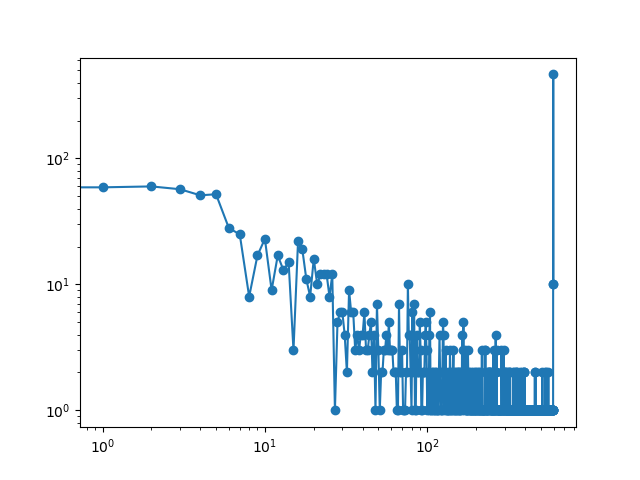

In [9]:
values = list(filter(lambda x: x!= 0, list(tk_to_freq.values())))
plt.loglog(values,marker='o')

In [2]:
from NLPUtils.datasets.imdb import BinaryBOWDataset
import time
import torch

dataset = BinaryBOWDataset.split(dev_size=.1,vocab=10000,test=False,include_unk=True,include_startend=True,
                                 in_dtype=torch.float,out_dtype=torch.long)

10000
10001
10003
10003
[10001, 2177, 3779, 824, 296, 4, 24, 8980, 18, 0, 186, 10, 0, 1890, 2281, 4, 119, 6356, 179, 10000, 0, 3851, 18, 602, 3470, 2413, 9, 15, 5, 448, 10000, 0, 1489, 683, 122, 5, 10000, 448, 10000, 10000, 85, 4, 1540, 350, 5, 2, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 2643, 179, 5159, 2, 10000, 10000, 3276, 7, 157, 736, 10000, 113, 21, 4663, 4, 94, 10000, 98, 10000, 155, 399, 376, 6, 201, 1, 244, 6, 10000, 9, 2217, 86, 3908, 44, 10000, 1, 0, 15, 43, 47, 610, 730, 4, 94, 41, 10000, 4904, 10000, 184, 10000, 33, 22, 19, 3611, 10000, 0, 283, 2262, 1230, 2, 207, 59, 10000, 181, 2643, 10000, 10000, 10000, 0, 221, 43, 89, 4304, 1, 5627, 6, 7, 10, 2643, 5, 2, 363, 10000, 10000, 10000, 29, 0, 167, 57, 12, 108, 2, 1403, 10000, 8644, 2871, 6685, 558, 10000, 9, 10000, 5, 110, 10, 72, 3, 31, 1826, 10000, 82, 1861, 6366, 10000, 12, 2643, 10000, 3352, 10000, 96, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 1730, 5706, 10000, 2643, 100

161.04061770439148
67.91288781166077
10000
10001
10003
10003
[10001, 0, 10000, 744, 3, 10000, 5066, 1, 10000, 10000, 67, 641, 377, 7, 8752, 10000, 238, 33, 90, 52, 165, 104, 10000, 12, 5, 0, 403, 13, 47, 78, 3056, 3, 63, 1002, 10000, 697, 10000, 10000, 10000, 10000, 10000, 10000, 9832, 3845, 10000, 0, 87, 6208, 404, 3, 17, 894, 13, 5066, 1, 10000, 5, 0, 7254, 41, 92, 10000, 7, 59, 33, 10000, 962, 30, 78, 151, 10000, 10000, 1333, 68, 10000, 10000, 1177, 4689, 10000, 1, 10, 10000, 10000, 124, 3109, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 7, 63, 10000, 10000, 5066, 1, 10000, 67, 35, 6002, 1034, 10, 153, 10000, 8752, 491, 10000, 3372, 3899, 1, 3728, 10000, 10000, 3203, 729, 12, 72, 6404, 3402, 31, 215, 6253, 491, 10000, 2551, 1513, 0, 10000, 10000, 10000, 5066, 1, 10000, 10000, 10000, 10000, 146, 10000, 37, 11, 2, 650, 1413, 7, 0, 4442, 10000, 568, 10000, 10000, 5066, 1, 10000, 1500, 7, 1371, 10000, 10000, 2627, 10000, 5201, 13, 171, 6842, 33, 10000, 10000, 1, 823, 6

1.542182207107544


In [4]:
print(dataset['train'][0])
print(len(dataset['train']))

(tensor([ 16.,  11.,  12.,  ..., 117.,   1.,   1.]), tensor([1]))
22500


In [8]:
model = nlp.classifiers.LogisticRegressionClassifier(10003)

In [16]:
model.predict(dataset['dev'])

Total accuracy: 1240/2500 (49.60%)


In [14]:
model = nlp.classifiers.LinearSoftmaxClassifier(10003,2)
model.predict(dataset['dev'])

Total accuracy: 1240/2500 (49.60%)


In [7]:
import sys, os
sys.path.append(os.path.join(sys.path[0].split('BecaNLP')[0],'BecaNLP/Utils'))
import NLPUtils as nlp
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from NLPUtils.datasets import imdb

In [15]:
import time

tic = time.time()
for text in imdb.read_unsup_it():
    pass
toc = time.time()
print(toc-tic)

tic = time.time()
ds = imdb.read_unsup()    
for text in ds:
    pass
toc = time.time()
print(toc-tic)

511.77842926979065


NameError: name 'pd' is not defined

In [2]:
import re

text_to_search = "adfasaidjwqwen1823612nashdahgsd17238123"

pattern = re.compile(r'(\w+)(\d+)(\w+)')

pattern.findall(text_to_search)

[('adfasaidjwqwen1823612nashdahgsd172381', '2', '3')]

In [6]:
import sys, os
sys.path.append(os.path.join(sys.path[0].split('BecaNLP')[0],'BecaNLP/Utils'))
import NLPUtils as nlp
from NLPUtils.datasets import imdb
import pandas as pd


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import time

tic = time.time()
for text in imdb.read_unsup_it():
    pass
toc = time.time()
print(toc-tic)

tic = time.time()
ds = imdb.read_unsup()    
for text in ds:
    pass
toc = time.time()
print(toc-tic)

2.3131158351898193
2.0256595611572266


In [14]:
import csv

string = ['11872,"This is a good, mild, entertaining family-oriented fantasy movie. SFX by Harryhausen are good era & genre-wise. However this movie is not quite a pure SFX extravaganza, but belongs better to a fairy tale, say Krull or else. You get many conventional subplots: * good prince is turned into a baboon while his evil stepmother wants to see her own son becoming Calif. * belle princess in love with the brave sailor Sinbad. * a secret hermit from a mysterious island. * mummies out of hell, giant tigers, a robot minotaur. * only six moons to counter the spell. * a trip through the north pole. etc etc. A nice movie, very easily watchable."\n']
parsed_string = csv.reader([],delimiter=',')
for i in parsed_string:
    print(i)